In [1]:
!pip install pytorch_pretrained_bert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 608.7 kB/s eta 0:00:0000:0100:01


In [2]:
from pytorch_pretrained_bert import cached_path
import json
from tqdm import tqdm
import pandas as pd
from datasets import Dataset, DatasetDict

In [3]:
url = "https://s3.amazonaws.com/datasets.huggingface.co/personachat/personachat_self_original.json"

In [4]:
personachat_file = cached_path(url)
with open(personachat_file, "r", encoding="utf-8") as f:
    dataset = json.loads(f.read())

100%|██████████| 209850483/209850483 [00:08<00:00, 23320503.01B/s]


In [5]:
replicas_valid = []
sumarized_valid = []

for dialog in tqdm(dataset["valid"]):
    sumarized_valid += [" ".join(dialog["personality"])]
    replicas_valid += [" ".join(dialog["utterances"][-1]["history"][1::2])]

replicas_train = []
sumarized_train = []

for dialog in tqdm(dataset["train"]):
    sumarized_train += [" ".join(dialog["personality"])]
    replicas_train += [" ".join(dialog["utterances"][-1]["history"][1::2])]

100%|██████████| 17878/17878 [00:00<00:00, 345468.97it/s]


In [6]:
replicas_valid = replicas_valid
sumarized_valid = sumarized_valid

replicas_train = replicas_train
sumarized_train = sumarized_train

df_train = pd.DataFrame({"text": replicas_train, "summary": sumarized_train})
df_valid = pd.DataFrame({"text": replicas_valid, "summary": sumarized_valid})

df_train = Dataset.from_pandas(df_train)
df_valid = Dataset.from_pandas(df_valid)

ds = DatasetDict()

ds['train'] = df_train
ds['test'] = df_valid

In [11]:
import matplotlib.pyplot as plt

def visualization(l, bins):

    plt.hist(l, bins=bins, edgecolor='black')
    plt.xlabel('len')
    plt.ylabel('count')
    plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 176016.79it/s]


text: 


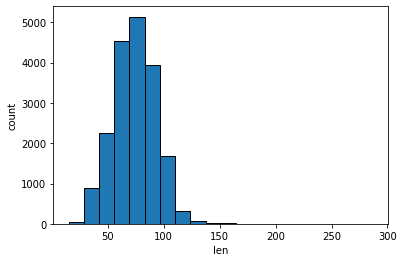

100%|██████████| 1000/1000 [00:00<00:00, 314133.01it/s]


summary: 


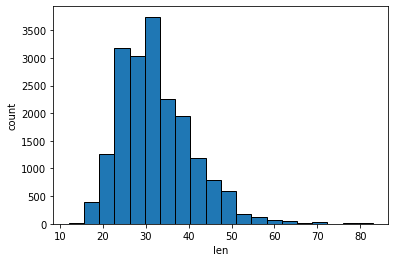

,text,summary
90%,98.00000,43.00000
99%,118.00000,58.00000
99.9%,162.12300,75.00000
99.99%,233.16580,82.00000
99.999%,284.54599,82.81123


In [12]:
import matplotlib.pyplot as plt

def visualization(l, bins):

    plt.hist(l, bins=bins, edgecolor='black')
    plt.xlabel('len')
    plt.ylabel('count')
    plt.show()

l_text = []
for i in tqdm(df_train["text"]):
    l_text+= [len(i.split())]

for i in tqdm(df_valid["text"]):
    l_text+= [len(i.split())]
print("text: ")
visualization(l_text,20)


l_summary = []
for i in tqdm(df_train["summary"]):
    l_summary+= [len(i.split())]

for i in tqdm(df_valid["summary"]):
    l_summary+= [len(i.split())]
print("summary: ")
visualization(l_summary,20)

df_len = pd.DataFrame({"text": l_text, "summary": l_summary})

df_len.describe(percentiles=[0.9,0.99, 0.999, 0.9999, 0.99999])[5:10]